### A. Webscrape 2022 US Treasury Bills and Notes competitive Auctions


In [1]:
# Import libraries and our helper functions
import pandas as pd
import matplotlib.pyplot as plt
from Helper import get_2022_bills_webscrape, get_2022_notes_webscrape, parse_xml  # From Helper.py file
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# Save to csv in webscrapes_results folder
# Due to the website rendering server bad lag, we run this ONCE ONLY and save the results out
# This block of code has already been run before and results are saved under webscrape_results folder
url = "https://www.treasurydirect.gov/auctions/announcements-data-results/announcement-results-press-releases/"
bill_URLs = get_2022_bills_webscrape(url)
note_URLs = get_2022_notes_webscrape(url)

bills_DF = pd.DataFrame(bill_URLs)
note_DF = pd.DataFrame(note_URLs)

bills_DF.to_csv("webscrape_results/bill_URLs_2022.csv", index= False)
note_DF.to_csv("webscrape_results/note_URLs_2022.csv", index= False)

### B. Data Transformation

In [2]:
# Read csv files for webscraped URLs saved and convert to lists
# Disclaimer: This code block takes ~10 mins to load due to the amount of URLs to read and parse accordingly from XML to Dicts
bills_URL = pd.read_csv("webscrape_results/bill_URLs_2022.csv")['0'].tolist()
note_URL = pd.read_csv("webscrape_results/note_URLs_2022.csv")['0'].tolist()

# Parse them using our helper function
bills_DF = []  # Consists of all of the bills data of 2022
note_DF = []  # Consists of all of the notes data of 2022

for url in bills_URL:
    bill_dict = parse_xml(url)  # output as dicts
    bills_DF.append(bill_dict)

for url in note_URL:
    note_dict = parse_xml(url)
    note_DF.append(note_dict)

# Convert to Dataframe
bills_DF = pd.DataFrame(bills_DF)
note_DF = pd.DataFrame(note_DF)

# Drop columns where all values inside it is NaN -> these columns are irrelevant for our analysis later
bills_DF = bills_DF.dropna(axis=1, how='all')
note_DF = note_DF.dropna(axis=1, how='all')


In [5]:
# See below on suggested data type for each column in bills dataframe
bills_DF_dtype = {
    "SOMAHoldings":"float64",
    "InvestmentRate":	"float64",
    "MaturingDate":	"datetime64[ns]",
    "LowDiscountRate":	"float64",
    "MatureSecurityAmount":	"float64",
    "PrimaryDealerAccepted":	"float64",
    "InflationIndexSecurity":	"object",
    "HighAllocationPercentage":	"float64",
    "TotalTendered":	"float64",
    "NonCompetitiveTenderAccepted":	"object",
    "NLPExclusionAmount":	"float64",
    "TotalAccepted":	"float64",
    "NonCompetitiveAccepted":	"float64",
    "OfferingAmount":	"float64",
    "AmountAcceptedBelowLowRate":	"float64",
    "MinToIssue":	"float64",
    "TypeOfAuction":	"object",
    "CompetitiveTendered":	"float64",
    "MaxAward":	"float64",
    "TreasuryDirectAccepted":	"float64",
    "HighDiscountRate":	"float64",
    "SOMAIncluded":	"object",
    "DirectBidderAccepted":	"float64",
    "CompetitiveTenderAccepted":	"object",
    "AllocationPercentageDecimals":	"int64",
    "MaturityDate":	"datetime64[ns]",
    "SOMATendered":	"float64",
    "FIMAAccepted":	"float64",
    "MinBidAmount":	"float64",
    "ResultsPDFName":	"object",
    "MultiplesToBid":	"float64",
    "IssueDate":	"datetime64[ns]",
    "AnnouncementDate":	"datetime64[ns]",
    "AuctionDate":	"datetime64[ns]",
    "TreasuryDirectTenderAccepted":	"object",
    "SecurityTermDayMonth":	"object",
    "SOMAAccepted":	"float64",
    "CompetitiveBidDecimals": "float64",
    "MaximumNonCompAward":"float64",
    "CUSIP":	"object",
    "ReOpeningIndicator":	"object",
    "OriginalIssueDate":	"datetime64[ns]",
    "IndirectBidderAccepted":	"float64",
    "SecurityType":	"object",
    "MedianDiscountRate":	"float64",
    "NetLongPositionReport":	"float64",
    "ReleaseTime":	"object",
    "SecurityTermWeekYear":	"object",
    "AnnouncementPDFName":	"object",
    "HighPrice":	"float64",
    "FloatingRate":	"object",
    "FrequencyInterestPayment":	"object",
    "PrimaryDealerTendered":	"float64",
    "CompetitiveClosingTime":	"object",
    "MaxSingleBid":	"float64",
    "CompetitiveAccepted":	"float64",
    "CompetitiveBidIncrement":	"float64",
    "MultiplesToIssue":	"float64",
    "IndirectBidderTendered":	"float64",
    "FIMATendered":	"float64",
    "NonCompetitiveClosingTime":	"object",
    "BidToCoverRatio":	"float64",
    "DirectBidderTendered":	"float64",
    "FIMAIncluded":	"object",
    "CurrentlyOutstanding":	"float64"
}

# Coerce dtypes to what we desire based on the dictionary above
bills_DF= bills_DF.astype(bills_DF_dtype)
bills_DF.dtypes


MinBidAmount                           float64
PrimaryDealerAccepted                  float64
AnnouncementDate                datetime64[ns]
CompetitiveBidDecimals                 float64
MatureSecurityAmount                   float64
IssueDate                       datetime64[ns]
ReOpeningIndicator                      object
HighPrice                              float64
FrequencyInterestPayment                object
NonCompetitiveTenderAccepted            object
AuctionDate                     datetime64[ns]
InvestmentRate                         float64
TypeOfAuction                           object
CUSIP                                   object
AnnouncementPDFName                     object
MaximumNonCompAward                    float64
TotalAccepted                          float64
SOMAAccepted                           float64
TreasuryDirectAccepted                 float64
IndirectBidderAccepted                 float64
FIMAIncluded                            object
NetLongPositi

In [6]:
# See below on suggested data type for each column in bills dataframe
note_DF_dtype = {
    "BackDated":	"object",
    "PrimaryDealerAccepted":	"float64",
    "MedianYield":	"float64",
    "InflationIndexSecurity":	"object",
    "PrimaryDealerTendered":	"float64",
    "SOMAAccepted":	"float64",
    "HighYield":	"float64",
    "NonCompetitiveTenderAccepted":	"object",
    "Series":	"object",
    "InterestRate":	"float64",
    "ReleaseTime":	"object",
    "CUSIP":	"object",
    "HighAllocationPercentage":	"float64",
    "AmountAcceptedBelowLowRate":	"float64",
    "MinToIssue":	"float64",
    "TypeOfAuction":	"object",
    "OriginalDatedDate":	"datetime64[ns]",
    "TreasuryDirectAccepted":	"float64",
    "TotalAccepted":	"float64",
    "CompetitiveClosingTime":	"object",
    "LongShortNormalCoupon":	"object",
    "DirectBidderAccepted":	"float64",
    "DirectBidderTendered":	"float64",
    "NonCompetitiveClosingTime":	"object",
    "SOMAIncluded":	"object",
    "CompetitiveTenderAccepted":	"object",
    "IndirectBidderAccepted":	"float64",
    "AllocationPercentageDecimals":	"float64",
    "MaxAward":	"float64",
    "ResultsPDFName":	"object",
    "MinBidAmount":	"float64",
    "CurrentlyOutstanding":	"float64",
    "SOMAHoldings":	"float64",
    "MultiplesToBid":	"float64",
    "IssueDate":	"datetime64[ns]",
    "OriginalIssueDate":	"datetime64[ns]",
    "SecurityType":	"object",
    "AuctionDate":	"datetime64[ns]",
    "SecurityTermWeekYear":	"object",
    "TreasuryDirectTenderAccepted":	"object",
    "Callable":	"object",
    "SecurityTermDayMonth":	"object",
    "BackDatedDate":	"datetime64[ns]",
    "CompetitiveBidDecimals":	"float64",
    "ReOpeningIndicator":	"object",
    "OfferingAmount":	"float64",
    "MaturingDate":	"datetime64[ns]",
    "MaximumNonCompAward":	"float64",
    "NonCompetitiveAccepted":	"float64",
    "FIMATendered":	"float64",
    "AccruedInterest":	"float64",
    "CompetitiveTendered":	"float64",
    "AnnouncedCUSIP":	"object",
    "MaxSingleBid":	"object",
    "FrequencyInterestPayment":	"object",
    "OriginalCUSIP":	"object",
    "AnnouncementDate":	"datetime64[ns]",
    "StrippableIndicator":	"object",
    "TINTCUSIP1":	"object",
    "FIMAAccepted":	"float64",
    "HighPrice":	"float64",
    "DatedDate":	"datetime64[ns]",
    "FloatingRate":	"object",
    "FirstInterestPaymentDate":	"datetime64[ns]",
    "CompetitiveAccepted":	"float64",
    "MultiplesToIssue":	"float64",
    "IndirectBidderTendered":	"float64",
    "CompetitiveBidIncrement":	"float64",
    "StandardInterestPayment":	"float64",
    "NLPExclusionAmount":	"float64",
    "BidToCoverRatio":	"float64",
    "TotalTendered":	"float64", 
    "MaturityDate":	"datetime64[ns]",
    "CorpusCUSIP":	"object",
    "SOMATendered"	:"float64",
    "NetLongPositionReport":	"float64",
    "MinStripAmount":	"float64",
    "FIMAIncluded":	"object",
    "AnnouncementPDFName":	"object",
    "LowYield":	"float64",
    "MatureSecurityAmount":	"float64"

}

# Coerce dtypes to what we desire based on the dictionary above
note_DF= note_DF.astype(note_DF_dtype)
note_DF.dtypes

MinBidAmount                           float64
ReOpeningIndicator                      object
CompetitiveBidDecimals                 float64
CompetitiveClosingTime                  object
MaturingDate                    datetime64[ns]
IndirectBidderTendered                 float64
CorpusCUSIP                             object
IssueDate                       datetime64[ns]
DirectBidderTendered                   float64
NonCompetitiveTenderAccepted            object
InterestRate                           float64
AuctionDate                     datetime64[ns]
TypeOfAuction                           object
MaximumNonCompAward                    float64
Series                                  object
SecurityTermDayMonth                    object
FirstInterestPaymentDate        datetime64[ns]
StandardInterestPayment                float64
HighAllocationPercentage               float64
ReleaseTime                             object
BidToCoverRatio                        float64
FIMAIncluded 

### C. Analysis of auction results

To derive any observations and patterns in auction results, we first look to understand how US treasury auction works:
1. US Treasury first accepts all non competitive bids which comply with the auction rules
2. US Treasury then accept competitive bids (In terms of Yield, rate, etc) from the lowest all the way to the highest bid (i.e. High Yield)
 until the entire offering is cleared
3. All successful bidders get the same rate/yield and same price (i.e. High Price)
    - High yield in this case is the highest yield in which the auction is cleared of the securities
    - High price is a uniform price which investors pay after the auction for the instrument they bid (i.e Notes, Bills, etc)

Following which, we look at the following key characteristics of an auction result for bills and notes to get insights:
1. **Bid-to-Cover ratio**: 
    - Shows the ratio of bids received to bids sold
    - A high bid-to-cover ratio compared to the prior auction results indicates a rising demand in the bill/note
    - In contrast, a lower bid-to-cover ratio to prior auction results indicates a falling demand in bill/note
2. **High Discount Rate (For Bills)**: 
    - Shows the discount rate at which the treasury auction clears for Bills
3. **High Yield (For Notes)**: 
    - Shows the yield at which the treasury auction clears for Notes
    - If an investors submit a higher yield bid, it typically indicates they are willing to "purchase" the note only with higher interest compensated

---
**Here is my analysis for auction results of Bills and Bonds in 2022:**

Based on the explanation of the following relevant characteristics of the auction results, we categorise our observations under them:
1. **Bid-to-cover ratio**
    - Demand for Bills across all terms generally increased in first half of year and subsequently declined in next half of year
    - Demand for 52-Week Bills however has a stronger increased demand towards the end of the year 2022
    - Stronger demand in shorter term maturities of Notes as compared to longer term of Notes towards the end of the year 2022
2. **High Discount Rate (For Bills)**
    - High Discount rate generally increased for all Notes of various terms throughout 2022 per the graph
    - The longer the security term of bills, the higher the high discount rate of these bills per the graph
3. **High Yield (For Notes)**
    - High Yield generally increased for all Notes of various terms throughout 2022, which could potentially indicate investors expectations of higher interest rates throughout the year 2022
    - Higher "High Yield" for lower term notes as compared to higher term notes in 2022, which could potentially indicate signs of inverse yield curve

Please see the below subsections on each characteristics for graphs plotted to support the above observations of auction results.
    
---


#### Bid to Cover Ratios of Bills and Notes

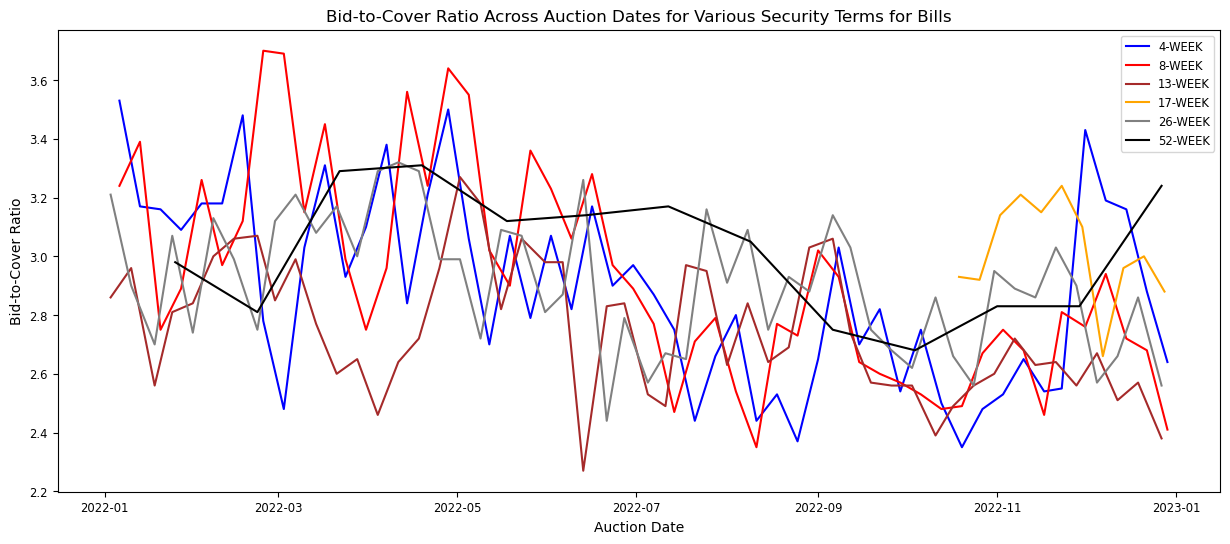

In [7]:
# Bid to cover spread ratios (Measures demand of security relative to amount of securities offered)
color_dict_bills = {"4-WEEK": "blue",
            "8-WEEK": "red",
            "13-WEEK": "brown",
            "17-WEEK": "orange",
            "26-WEEK": "gray",
            "52-WEEK": "black"}
order_bills = ["4-WEEK","8-WEEK", "13-WEEK", "17-WEEK", "26-WEEK","52-WEEK"]

bidtocover_bills = bills_DF[["BidToCoverRatio", "SecurityTermWeekYear", "AuctionDate"]]
fig, ax = plt.subplots(figsize=(15, 6))  # Adjust the figsize as needed

for securityTerm in order_bills :
    subset_df = bidtocover_bills[bidtocover_bills['SecurityTermWeekYear'] == securityTerm]
    ax.plot(subset_df['AuctionDate'], 
            subset_df['BidToCoverRatio'], 
            label=securityTerm, 
            color=color_dict_bills.get(securityTerm, 'black'))

ax.set(title='Bid-to-Cover Ratio Across Auction Dates for Various Security Terms for Bills',
       xlabel='Auction Date',
       ylabel='Bid-to-Cover Ratio')
ax.tick_params(axis='both', labelsize='small')  
ax.legend(fontsize='small')  
plt.show()


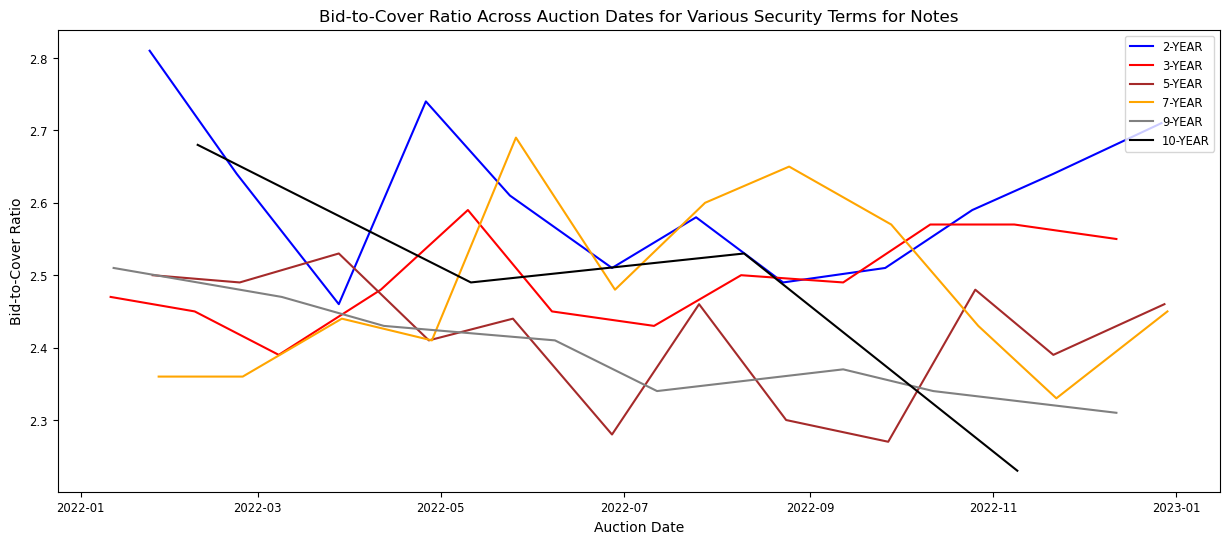

In [8]:
# Bid to cover spread ratios (Measures demand of security relative to amount of securities offered)
color_dict_notes = {"2-YEAR": "blue",
            "3-YEAR": "red",
            "5-YEAR": "brown",
            "7-YEAR": "orange",
            "9-YEAR": "gray",
            "10-YEAR": "black"}
order_notes = ["2-YEAR","3-YEAR", "5-YEAR", "7-YEAR", "9-YEAR","10-YEAR"]

bidtocover_notes = note_DF[["BidToCoverRatio", "SecurityTermWeekYear", "AuctionDate"]]
fig, ax = plt.subplots(figsize=(15, 6))  # Adjust the figsize as needed

for securityTerm in order_notes :
    subset_df = bidtocover_notes[bidtocover_notes['SecurityTermWeekYear'] == securityTerm]
    ax.plot(subset_df['AuctionDate'], 
            subset_df['BidToCoverRatio'], 
            label=securityTerm, 
            color=color_dict_notes.get(securityTerm, 'black'))

ax.set(title='Bid-to-Cover Ratio Across Auction Dates for Various Security Terms for Notes',
       xlabel='Auction Date',
       ylabel='Bid-to-Cover Ratio')
ax.tick_params(axis='both', labelsize='small')  
ax.legend(fontsize='small', loc = "upper right")  
plt.show()


#### High Discount Rate for Bills

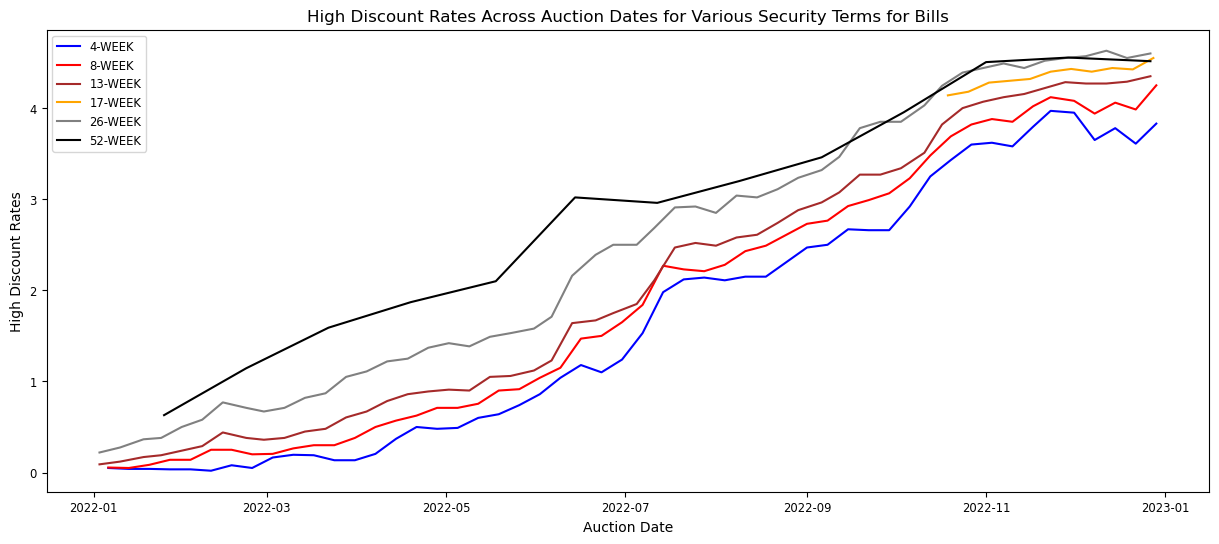

In [9]:
# Bid to cover spread ratios (Measures demand of security relative to amount of securities offered)
color_dict_bills = {"4-WEEK": "blue",
            "8-WEEK": "red",
            "13-WEEK": "brown",
            "17-WEEK": "orange",
            "26-WEEK": "gray",
            "52-WEEK": "black"}
order_bills = ["4-WEEK","8-WEEK", "13-WEEK", "17-WEEK", "26-WEEK","52-WEEK"]

bidtocover_bills = bills_DF[["HighDiscountRate", "SecurityTermWeekYear", "AuctionDate"]]
fig, ax = plt.subplots(figsize=(15, 6))  # Adjust the figsize as needed

for securityTerm in order_bills :
    subset_df = bidtocover_bills[bidtocover_bills['SecurityTermWeekYear'] == securityTerm]
    ax.plot(subset_df['AuctionDate'], 
            subset_df['HighDiscountRate'], 
            label=securityTerm, 
            color=color_dict_bills.get(securityTerm, 'black'))

ax.set(title='High Discount Rates Across Auction Dates for Various Security Terms for Bills',
       xlabel='Auction Date',
       ylabel='High Discount Rates')
ax.tick_params(axis='both', labelsize='small')  
ax.legend(fontsize='small')  
plt.show()


#### High Yield for Notes

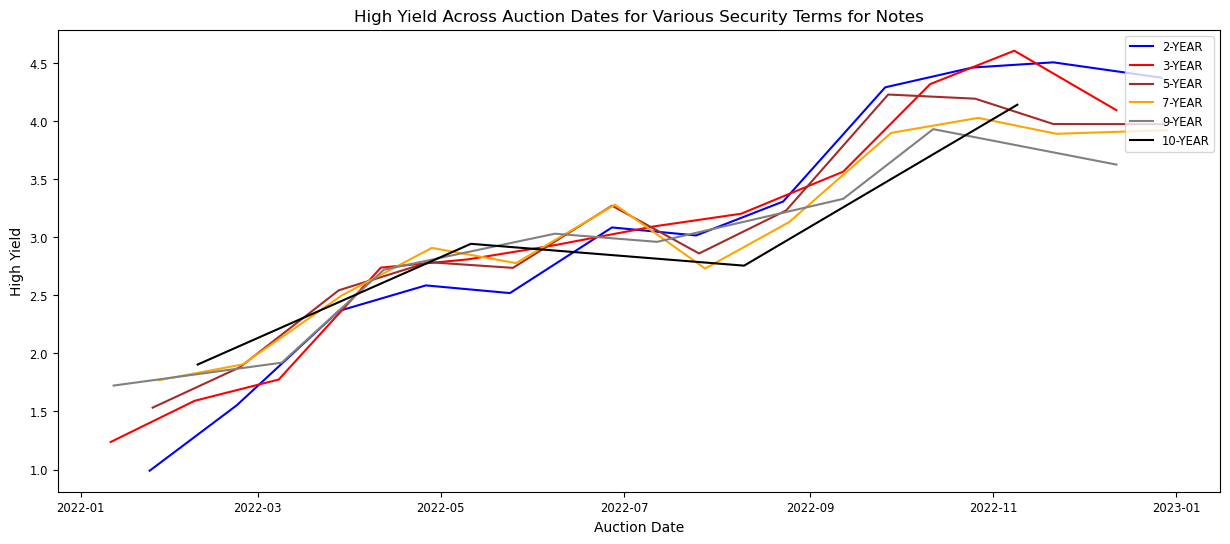

In [10]:
color_dict_notes = {"2-YEAR": "blue",
            "3-YEAR": "red",
            "5-YEAR": "brown",
            "7-YEAR": "orange",
            "9-YEAR": "gray",
            "10-YEAR": "black"}
order_notes = ["2-YEAR","3-YEAR", "5-YEAR", "7-YEAR", "9-YEAR","10-YEAR"]


highyield_notes = note_DF[["HighYield", "SecurityTermWeekYear", "AuctionDate"]]
fig, ax = plt.subplots(figsize=(15, 6))  # Adjust the figsize as needed

for securityTerm in order_notes :
    subset_df = highyield_notes[highyield_notes['SecurityTermWeekYear'] == securityTerm]
    ax.plot(subset_df['AuctionDate'], 
            subset_df['HighYield'], 
            label=securityTerm, 
            color=color_dict_notes.get(securityTerm, 'black'))

ax.set(title='High Yield Across Auction Dates for Various Security Terms for Notes',
       xlabel='Auction Date',
       ylabel='High Yield')
ax.tick_params(axis='both', labelsize='small')  
ax.legend(fontsize='small', loc = "upper right")  
plt.show()
